\begin{equation}
    \begin{cases}
        13.1x_1 + 9.2x_2 = 173\\
        8.3x_1 + 21x_2 = 271\\
        3.2x_1 - 8.3x_2 = 34
    \end{cases}\,
\end{equation}

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

Path("out").mkdir(parents=True, exist_ok=True)

f_1 = lambda _x: (173 - 13.1 * _x) / 9.2
f_2 = lambda _x: (271 - 8.3 * _x) / 21
f_3 = lambda _x: (34 - 3.2 * _x) / (-8.3)

x = np.linspace(0, 30, 100)
y1 = f_1(x)
y2 = f_2(x)
y3 = f_3(x)

plt.rcParams.update({"font.size": 10})

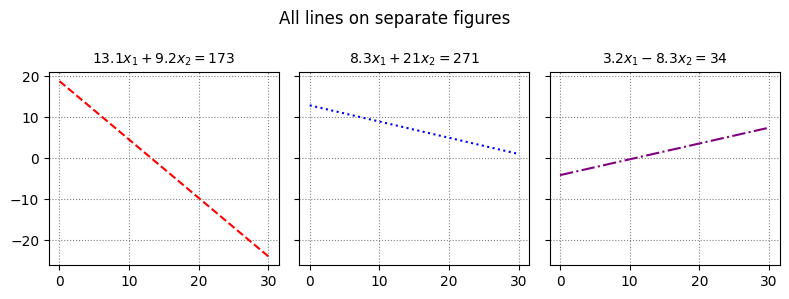

In [2]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8, 3), sharey=True)

ax1.plot(x, y1, color="red", linestyle="dashed")
ax2.plot(x, y2, color="blue", linestyle="dotted")
ax3.plot(x, y3, color="purple", linestyle="dashdot")

ax1.grid(color="grey", linestyle="dotted")
ax2.grid(color="grey", linestyle="dotted")
ax3.grid(color="grey", linestyle="dotted")

plt.suptitle("All lines on separate figures")
ax1.set_title("$13.1x_1 + 9.2x_2 = 173$", fontsize="10")
ax2.set_title("$8.3x_1 + 21x_2 = 271$", fontsize="10")
ax3.set_title("$3.2x_1 - 8.3x_2 = 34$", fontsize="10")

fig.tight_layout()
plt.savefig("out/1.jpg", bbox_inches="tight")
plt.savefig("out/1.png", bbox_inches="tight")
plt.savefig("out/1.svg", bbox_inches="tight")
plt.show()

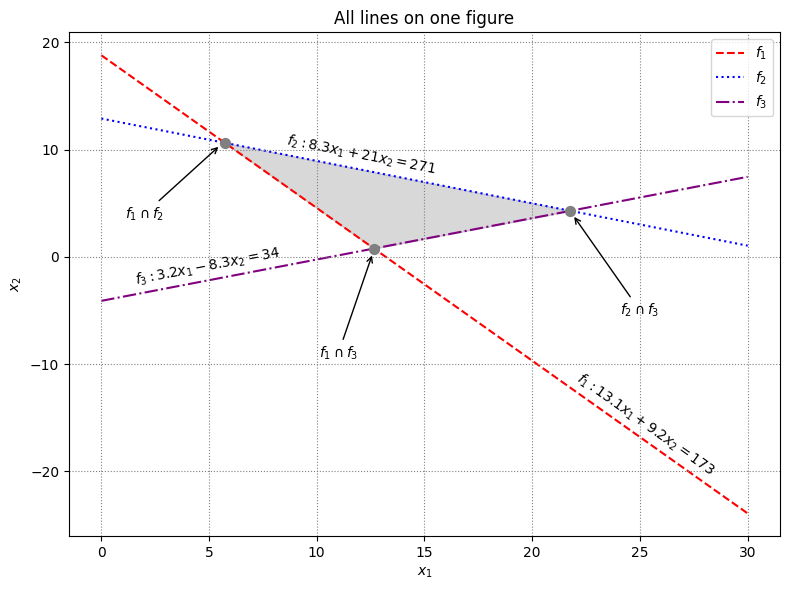

In [3]:
fig = plt.figure(figsize=(8, 6), dpi=100)

plt.plot(x, y1, color="red", linestyle="dashed", label="$f_1$", zorder=0)
plt.plot(x, y2, color="blue", linestyle="dotted", label="$f_2$", zorder=0)
plt.plot(x, y3, color="purple", linestyle="dashdot", label="$f_3$", zorder=0)

plt.text(25, f_1(25) + 0.5, "$f_1: 13.1x_1 + 9.2x_2 = 173$", rotation=np.degrees(np.arctan(-13.1 / 9.2)), fontsize=10, 
         rotation_mode="anchor", transform_rotates_text=True, ha="center", va="bottom")
plt.text(12, f_2(12) + 0.5, "$f_2: 8.3x_1 + 21x_2 = 271$", rotation=np.degrees(np.arctan(-8.3 / 21)), fontsize=10, 
         rotation_mode="anchor", transform_rotates_text=True, ha="center", va="bottom")
plt.text(5, f_3(5) + 0.5, "$f_3: 3.2x_1 - 8.3x_2 = 34$", rotation=np.degrees(np.arctan(-3.2 / (-8.3))), fontsize=10, 
         rotation_mode="anchor", transform_rotates_text=True, ha="center", va="bottom")

p = np.ndarray((3, 2), dtype=np.float32)
p[0] = np.linalg.solve(([13.1, 9.2], [8.3, 21]), (173, 271))
p[1] = np.linalg.solve(([8.3, 21], [3.2, -8.3]), (271, 34))
p[2] = np.linalg.solve(([13.1, 9.2], [3.2, -8.3]), (173, 34))
plt.scatter(*zip(*p), color="gray", s=50, zorder=1)

plt.fill_between(x, np.maximum.reduce([y1, y2, y3]), np.maximum(y1, y3), where=np.logical_and(x > p[0][0], x < p[1][0]), 
                 color="gray", alpha=0.3, zorder=-1)

plt.annotate("$f_1 \cap f_2$", p[0] + (-0.2, -0.2), xytext=(2, 4), fontsize=10, ha="center", va="center", arrowprops={"arrowstyle": "->"})
plt.annotate("$f_2 \cap f_3$", p[1] + (0.1, -0.35), xytext=(25, -5), fontsize=10, ha="center", va="center", arrowprops={"arrowstyle": "->"})
plt.annotate("$f_1 \cap f_3$", p[2] + (-0.05, -0.4), xytext=(11, -9), fontsize=10, ha="center", va="center", arrowprops={"arrowstyle": "->"})

plt.title("All lines on one figure")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.grid(color="grey", linestyle="dotted")

plt.tight_layout()
plt.savefig("out/2.jpg", bbox_inches="tight")
plt.savefig("out/2.png", bbox_inches="tight")
plt.savefig("out/2.svg", bbox_inches="tight")
plt.show()